# THE PENGUINS DATASET

**File:** Penguins.ipynb

**Course:** Data Science Foundations: Data Mining in Python

# INSTALL AND IMPORT LIBRARIES
This demonstration requires the `palmerpenguins` library, which can be installed with Python's `pip` command. This command only needs to be done once per machine.

The standard, shorter approach may work:

In [1]:
pip install palmerpenguins

Note: you may need to restart the kernel to use updated packages.


If the above command didn't work, it may be necessary to be more explicit, in which case you could run the code below.

In [ ]:
# import sys
# !{sys.executable} -m pip install palmerpenguins

Once `palmerpenguins` is installed, then load the libraries below.

In [2]:
from palmerpenguins import load_penguins  # For penguins dataset
import pandas as pd                       # For dataframes
import matplotlib.pyplot as plt           # For plotting functions
import seaborn as sns                     # For additional plotting functions

# LOAD AND PREPARE DATA
For all three demonstrations of clustering, we'll use the `penguins` dataset, which is available in the `palmerpenguins` package. It is also described at [https://pypi.org/project/palmerpenguins/](https://pypi.org/project/palmerpenguins/).

Following steps are used to prepare the data:

1. Load the `penguins` dataset in variable `df`
1. Remove the `island`, `year`, and `sex` variables
1. Rename the class variable `species` as `y`
1. Drop all rows with `NaN`
1. Display the first 5 rows of `df`

In [3]:
# Loads the penguins dataset
df = load_penguins()

# Drop variables and NaN cases, rename variable
df = df.drop(['island', 'year', 'sex'], axis=1) \
    .dropna() \
    .rename(columns={'species': 'y'})

# Displays the first 5 rows of data
df.head()

,y,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0


# EXPLORE THE DATA
Visualize various aspects of penguins dataset.

## Bar Plot of Class Variable
Use Seaborn's `countplot` function to create a bar plot and look at the distribution of different species

<Axes: xlabel='y', ylabel='count'>

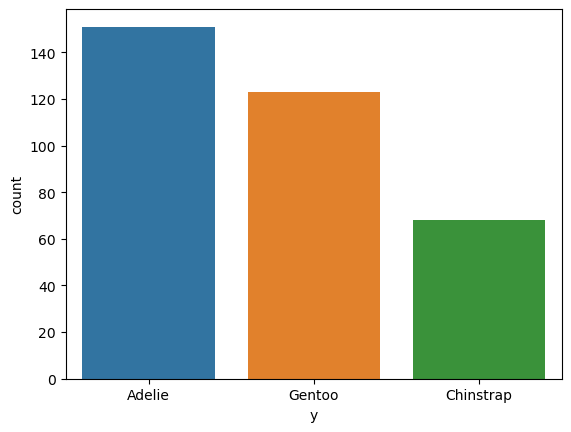

In [4]:
sns.countplot(x='y', data=df)

## Scatter Plots and Density Plots for Feature Pairs
Plot the relationships between all features using `PairGrid`. In particular, notice how `bill_length_mm` and `bill_depth_mm` variables are good at distinguishing between the species.

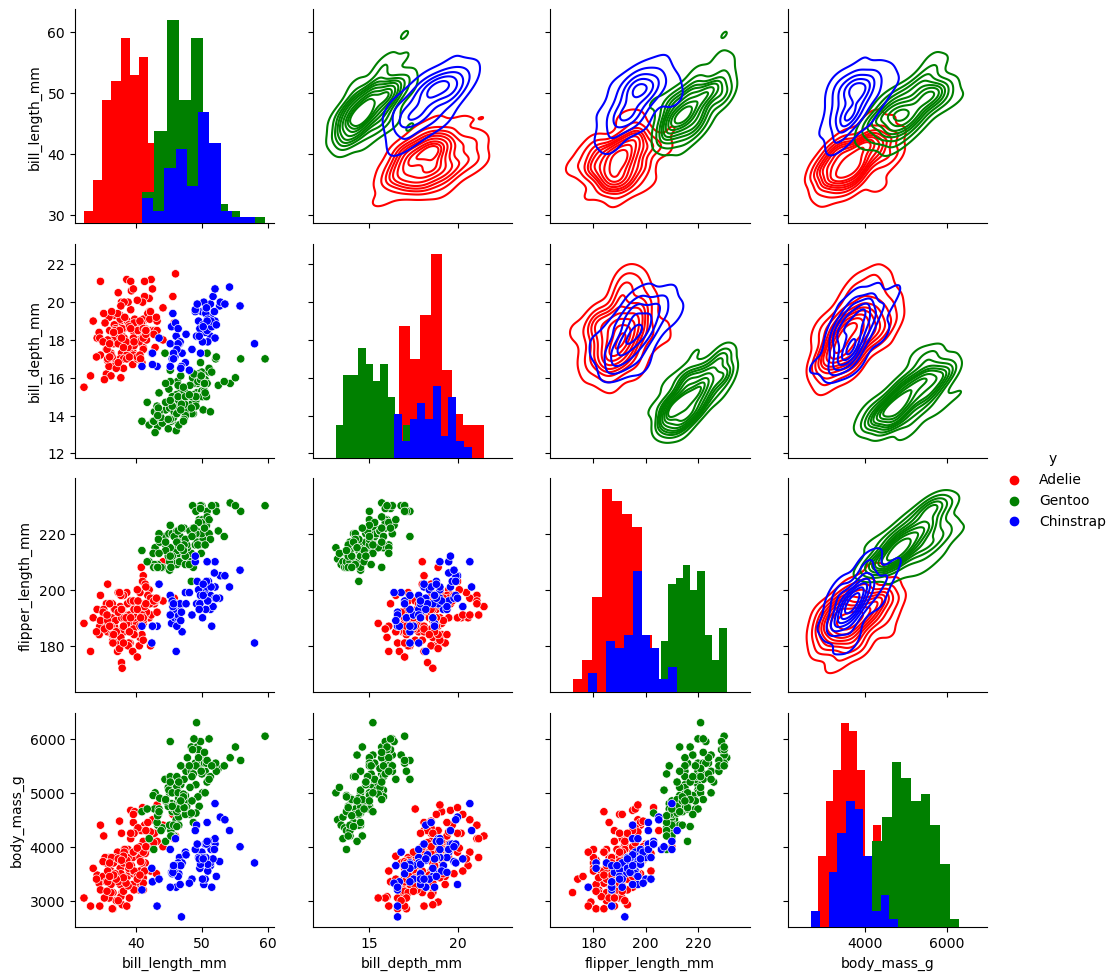

In [5]:
# Creates a grid using Seaborn's PairGrid()
g = sns.PairGrid(
    df, 
    vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], 
    hue='y', 
    diag_sharey=False, 
    palette=["red", "green", "blue"])

# Adds histograms on the diagonal
g.map_diag(plt.hist)

# Adds density plots above the diagonal
g.map_upper(sns.kdeplot)

# Adds scatterplots below the diagonal
g.map_lower(sns.scatterplot)

# Adds a legend
g.add_legend()

# SAVE DATA
Save the data as a CSV file.

In [ ]:
df.to_csv('data/penguins.csv', sep=',', index=False)

# CLEAN UP

- If desired, clear the results with Cell > All Output > Clear. 
- Save your work by selecting File > Save and Checkpoint.
- Shut down the Python kernel and close the file by selecting File > Close and Halt.